<a href="https://colab.research.google.com/github/ericmaniraguha/computer_vision_2023/blob/main/text_detection_from_image/text_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install easyocr


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##### 1. Steps:

1. Read the image
2. Instance text detector
3. detext text on Image
4. draw bbox and text

Requirements to install

1. easypcr === 1.6.2

- pip install easyocr

2. matplotlib === 3.6.2

3. opencv-python-headless === 4.5.4.60

- pip install opencv-python-headless==4.5.4.60

In [30]:
# Optical character recognition 

import cv2
import easyocr
import matplotlib.pyplot as plt
import numpy as np

# read image
image_path = '/content/Text_detection_image/images/test1.png'

img = cv2.imread(image_path)

# instance text detector
reader = easyocr.Reader(['en'], gpu=False)

# # Detect text on the image
text = reader.readtext(img)
#print our image
print(text)
 

[([[166, 126], [448, 126], [448, 182], [166, 182]], 'ROAD CLOSED', 0.9994066640174729), ([[167, 181], [447, 181], [447, 221], [167, 221]], 'TO ALL PEDESTRIAN', 0.9704424028567015), ([[209, 220], [409, 220], [409, 258], [209, 258]], 'AND BIKE USE', 0.9281837358273326)]


2. Display rectangle values into arrays and Draw the bbox and text

In [31]:
#draw bbox and text
for i in text:
  print(i)

([[166, 126], [448, 126], [448, 182], [166, 182]], 'ROAD CLOSED', 0.9994066640174729)
([[167, 181], [447, 181], [447, 221], [167, 221]], 'TO ALL PEDESTRIAN', 0.9704424028567015)
([[209, 220], [409, 220], [409, 258], [209, 258]], 'AND BIKE USE', 0.9281837358273326)


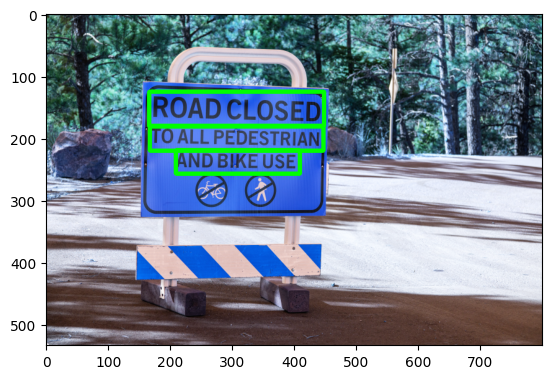

In [37]:
#draw bbox and text
for i in text:
  # print(i)
  bbox, text, score = i

# bbox[0] the left up corner of the rectangle values 
# bbox[2] the Right up corner of the rectangle values 

  cv2.rectangle(img, bbox[0],bbox[2],(0,255,0),5)

plt.imshow(img)
plt.show()

3. Display the image in the really color

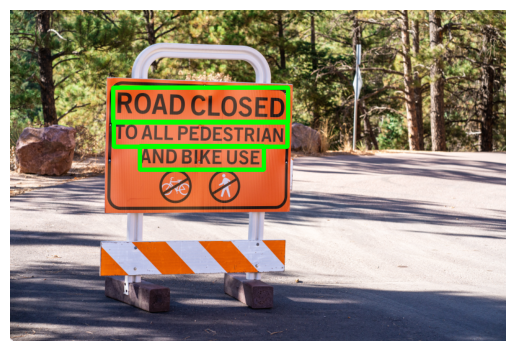

In [38]:
# Convert the image color space from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

4. Draw the text on top of the image 
- The updated code you provided converts the image color space to RGB, draws the recognized text on top of the image, and then displays the image using matplotlib.pyplot.imshow()

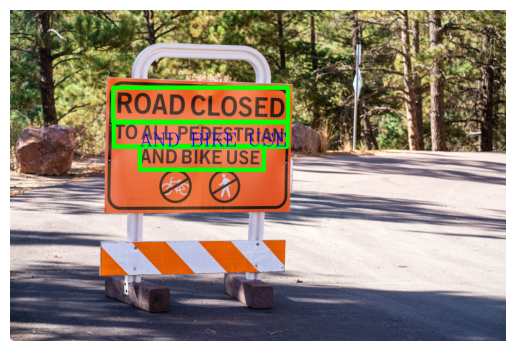

In [42]:
#draw the text on top of the image 
cv2.putText(img, text, bbox[0],cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0),1)

# Display the image using matplotlib
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

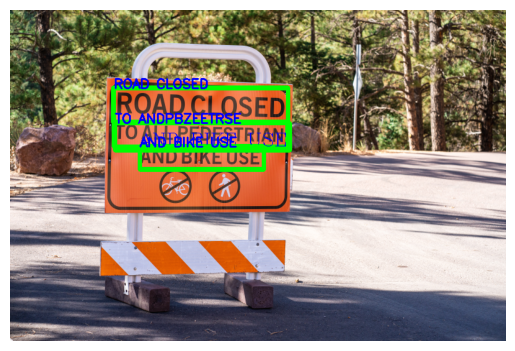

In [66]:
# Draw the recognized text on top of the image
text_result = reader.readtext(img)

for i in text_result:
    bbox, text, score = i
    cv2.rectangle(img, bbox[0], bbox[2], (0, 255, 0), 5)
    cv2.putText(img, text, bbox[0], cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

# Display the image with the recognized text
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


5. Display result of all three images from the files

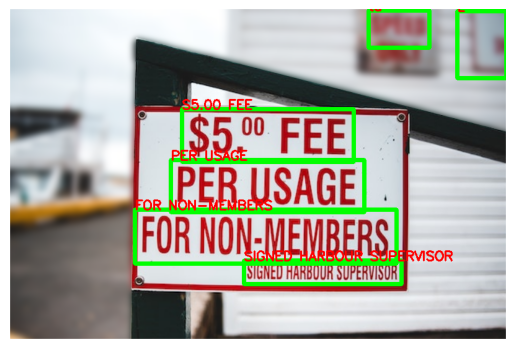

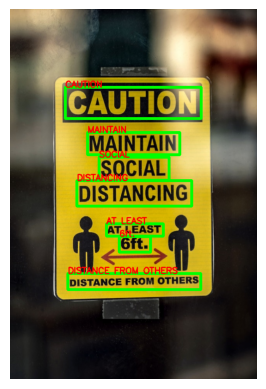

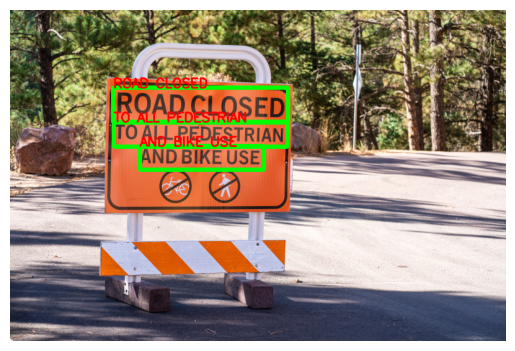

In [67]:
import os

# Directory path containing the images
directory_path = '/content/Text_detection_image/images'

# List all files in the directory
file_list = os.listdir(directory_path)

# Iterate over the files
for file_name in file_list:
    # Check if the file is an image
    if file_name.endswith('.png') or file_name.endswith('.jpg') or file_name.endswith('.jpeg'):
        # Construct the full file path
        file_path = os.path.join(directory_path, file_name)

        # Read the image
        img = cv2.imread(file_path)

        # Convert the image color space from BGR to RGB
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Detect text on the image
        text_result = reader.readtext(img)

        # Draw the recognized text on top of the image
        for bbox, text, score in text_result:
            cv2.rectangle(img_rgb, bbox[0], bbox[2], (0, 255, 0), 5)
            cv2.putText(img_rgb, text, bbox[0], cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

        # Display the image with the recognized text
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.show()


7. Store and display text of images 


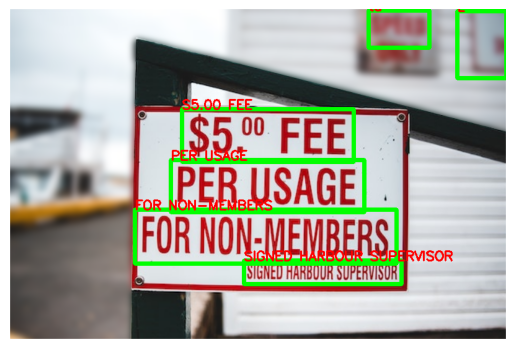

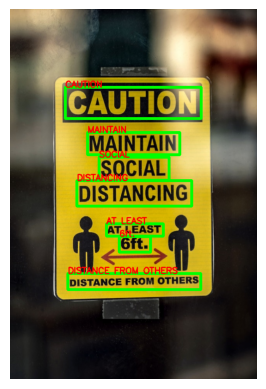

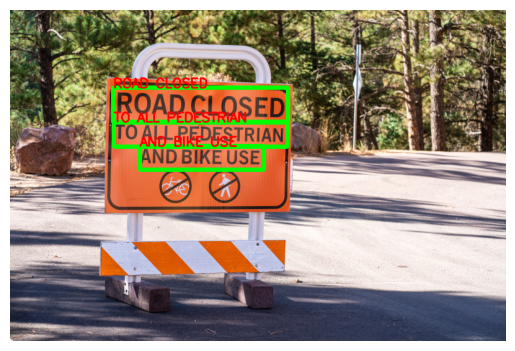

Image: test2.png
Text: td | Bounding Box: [[578, 2], [676, 2], [676, 62], [578, 62]]
Text: L | Bounding Box: [[721, 3], [800, 3], [800, 111], [721, 111]]
Text: S5.00 FEE | Bounding Box: [[277, 161], [554, 161], [554, 246], [277, 246]]
Text: PER USAGE | Bounding Box: [[259, 243], [571, 243], [571, 327], [259, 327]]
Text: FOR NON-MEMBERS | Bounding Box: [[201, 323], [623, 323], [623, 410], [201, 410]]
Text: SIGNED HARBOUR SUPERVISOR | Bounding Box: [[377, 405], [631, 405], [631, 443], [377, 443]]

Image: test3.png
Text: CAUTION | Bounding Box: [[134, 190], [464, 190], [464, 266], [134, 266]]
Text: MAINTAIN | Bounding Box: [[188, 300], [412, 300], [412, 354], [188, 354]]
Text: SOCIAL | Bounding Box: [[216, 360], [386, 360], [386, 416], [216, 416]]
Text: DISTANCING | Bounding Box: [[162, 417], [441, 417], [441, 479], [162, 479]]
Text: AT LEAST | Bounding Box: [[234, 522], [372, 522], [372, 552], [234, 552]]
Text: 6ft. | Bounding Box: [[265, 553], [341, 553], [341, 591], [265, 591]]
Text: D

In [69]:
# Directory path containing the images
directory_path = '/content/Text_detection_image/images'

# List to store the text results for each image
all_text_results = []

# List all files in the directory
file_list = os.listdir(directory_path)

# Iterate over the files
for file_name in file_list:
    # Check if the file is an image
    if file_name.endswith('.png') or file_name.endswith('.jpg') or file_name.endswith('.jpeg'):
        # Construct the full file path
        file_path = os.path.join(directory_path, file_name)

        # Read the image
        img = cv2.imread(file_path)

        # Convert the image color space from BGR to RGB
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Detect text on the image
        text_result = reader.readtext(img)

        # Store the text results for the image
        all_text_results.append((file_name, text_result))

        # Draw the recognized text on top of the image
        for bbox, text, score in text_result:
            cv2.rectangle(img_rgb, bbox[0], bbox[2], (0, 255, 0), 5)
            cv2.putText(img_rgb, text, bbox[0], cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

        # Display the image with the recognized text
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.show()

# Display the text results for each image
for image_name, text_result in all_text_results:
    print("Image:", image_name)
    for bbox, text, score in text_result:
        print("Text:", text, "| Bounding Box:", bbox)
    print()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')